**Dataset: Payment Fraud Detection**
Dataset link: https://drive.google.com/file/d/1gXW4hqSThkNeLJQnQZatctvzj05bkgqV/view?usp=sharing

In [2]:
# prompt: load the data set from the above google drive

import pandas as pd

# Load the dataset into a pandas DataFrame
fraud_data = pd.read_csv('payment_fraud.csv')

# Now you can work with the DataFrame 'df'
# For example, display the first few rows:
fraud_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_name                     51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Target                            51000 non-null  int64  
dtypes: f

In [5]:
fraud_data.head()

,Customer_name,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Target
0,Xr7Yi3Hv6Bk8Yi6T,4174,1292.76,ATM Withdrawal,16.0,Tablet,mumbai,0,119,13,Debit Card,0
1,Sj9Ik0Wt6Ky6Mu9U,4507,1554.58,ATM Withdrawal,13.0,Mobile,delhi,4,79,3,Credit Card,0
2,Lh9Rf5Dq8Nm3Sx8W,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,Mx3Tn2At7Es9Ox4P,2294,100.10,Bill Payment,15.0,Desktop,bangalore,4,3,4,UPI,0
4,Zs2Kd7Vl3On1Gq5E,2130,1490.50,POS Payment,19.0,Mobile,mumbai,2,57,7,Credit Card,0


In [6]:
fraud_data.shape

(51000, 12)

1. Create and analyze descriptive statistics for each column in the dataset. Include measures such as mean, median, standard deviation, min/max, 25th / 50th / 75th percentiles,skewness, and kurtosis values for numerical columns, and frequency counts and mode for categorical columns. Based on the descriptive statistics, summarize your findings about each feature.

In [3]:
# Numerical Stats
from scipy.stats import skew, kurtosis, mode

num_fraud_data_col= fraud_data.select_dtypes(include=['float64','int64']).columns
numerical_stats= fraud_data[num_fraud_data_col].describe()
numerical_stats.loc['skewness']= fraud_data[num_fraud_data_col].apply(lambda x: skew(x))
numerical_stats.loc['kurtosis']= fraud_data[num_fraud_data_col].apply(lambda x: kurtosis(x))
numerical_stats.loc['mode']= fraud_data[num_fraud_data_col].apply(lambda x: mode(x)[0])

# scipy.stats.mode() expects only numerical data  but pandas.Series.mode() can take categorical data

print("Numerical Columns Descriptive Statistics:")

numerical_stats

Numerical Columns Descriptive Statistics:


,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Target
count,51000.000000,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000
skewness,-0.001565,NaN,NaN,0.004440,-0.002970,0.005220,4.167792
kurtosis,-1.201213,NaN,NaN,-1.298786,-1.197096,-1.205375,15.370488


In [ ]:
# Categorical column stats
from scipy.stats import mode 

cat_col= fraud_data.select_dtypes(include=['object']).columns
cat_stats= {}


for col in cat_col:
    cat_stats[col]= {
        'mode': fraud_data[col].mode()[0],
        'frequency_counts': fraud_data[col].value_counts()
    }


for col, stats in cat_stats.items():
    print(f'\n column: {col}')
    print(f'\n mode: {stats['mode']}')
    print(f'\n frequency count: \n {stats['frequency_counts']}')



 column: Customer_name

 mode: Aa0Cc2Gy9Df8Bj4Y

 frequency count: 
 Customer_name
Ow9Nk7Ka1Mp3Qx4E    1
Xr7Yi3Hv6Bk8Yi6T    1
Sj9Ik0Wt6Ky6Mu9U    1
Lh9Rf5Dq8Nm3Sx8W    1
Mx3Tn2At7Es9Ox4P    1
                   ..
Qw4Cm9Bm0Vr2Ua4F    1
Nr1Jd4Hj7Ye1Fw9X    1
Zh8Nq2Ma3Sa2Cg3V    1
Yi4Pk7Yx9Ka4Mo6G    1
Sd7Pb7Kv0Qx9Jp2U    1
Name: count, Length: 51000, dtype: int64

 column: Transaction_Type

 mode: Bill Payment

 frequency count: 
 Transaction_Type
Bill Payment       10340
Bank Transfer      10276
ATM Withdrawal     10164
POS Payment        10126
Online Purchase    10094
Name: count, dtype: int64

 column: Device_Used

 mode: Desktop

 frequency count: 
 Device_Used
Desktop           15795
Mobile            15614
Tablet            15588
Unknown Device     1530
Name: count, dtype: int64

 column: Location

 mode: chennai

 frequency count: 
 Location
chennai      6149
delhi        6110
pune         6104
bangalore    6071
kolkata      6031
Ahmedabad    6012
hydrabad     5991
mumbai      

2. Analyze missing values in the dataset:
(a) Identify which features contain missing values and quantify them both in terms of rows and columns.
(b) Create appropriate visualization(s) to clearly display the pattern of missing values across the entire dataset. (Hint: can you create a plot which contains a rectangular block representing the entire dataset, with missing values highlighted in a different colour within this block?)
(c) Based on your observations, propose and implement appropriate handling strategies for the missing values. Justify your approach for each feature.
(d) After implementing your strategy, report the final data size. Are there any rows or
columns that were completely dropped? Explain why.

# Identify which features contain missing values and quantify them both in terms of rows and columns.

In [5]:

missing_vaules= fraud_data.isnull().sum()


# Quantify missing values
missing_values_summary = pd.DataFrame({
    'Feature': missing_vaules.index,
    'Missing Values': missing_vaules.values,
    'Percentage': (missing_vaules.values / len(fraud_data)) * 100
})

missing_values_summary= missing_values_summary[missing_values_summary['Missing Values']>0].sort_values(by='Missing Values', ascending=False)
print('features with missing vaules:')
missing_values_summary



features with missing vaules:


,Feature,Missing Values,Percentage
4,Time_of_Transaction,2552,5.003922
6,Location,2547,4.994118
2,Transaction_Amount,2520,4.941176
5,Device_Used,2473,4.849020
10,Payment_Method,2469,4.841176


In [17]:
# rows with missing vaules 
# axis=1 refers to row-wise operation, any (axis=1) checks if any vaule in a row is null
rows_with_missing_val= fraud_data.isnull().any(axis=1).sum()
print(f'\n rows with atleast one missing values: {rows_with_missing_val}')


 rows with atleast one missing values: 11417


In [7]:
cellss_missing_vaule= fraud_data.isnull().sum().sum()
print(f'\n toal numer of cells missing the vaule {cellss_missing_vaule}, percentage of total cells: {cellss_missing_vaule/(fraud_data.shape[0]*fraud_data.shape[1])*100:.2f}%')


 toal numer of cells missing the vaule 12561, percentage of total cells: 2.05%


only 2.05 percentage of cells are missing the data, below we will use appropriate strategies to fix the missing vaules or we will drop the values. 

# Create appropriate visualization(s) to clearly display the pattern of missing values across the entire dataset. (Hint: can you create a plot which contains a rectangular block representing the entire dataset, with missing values highlighted in a different colour within this block?)

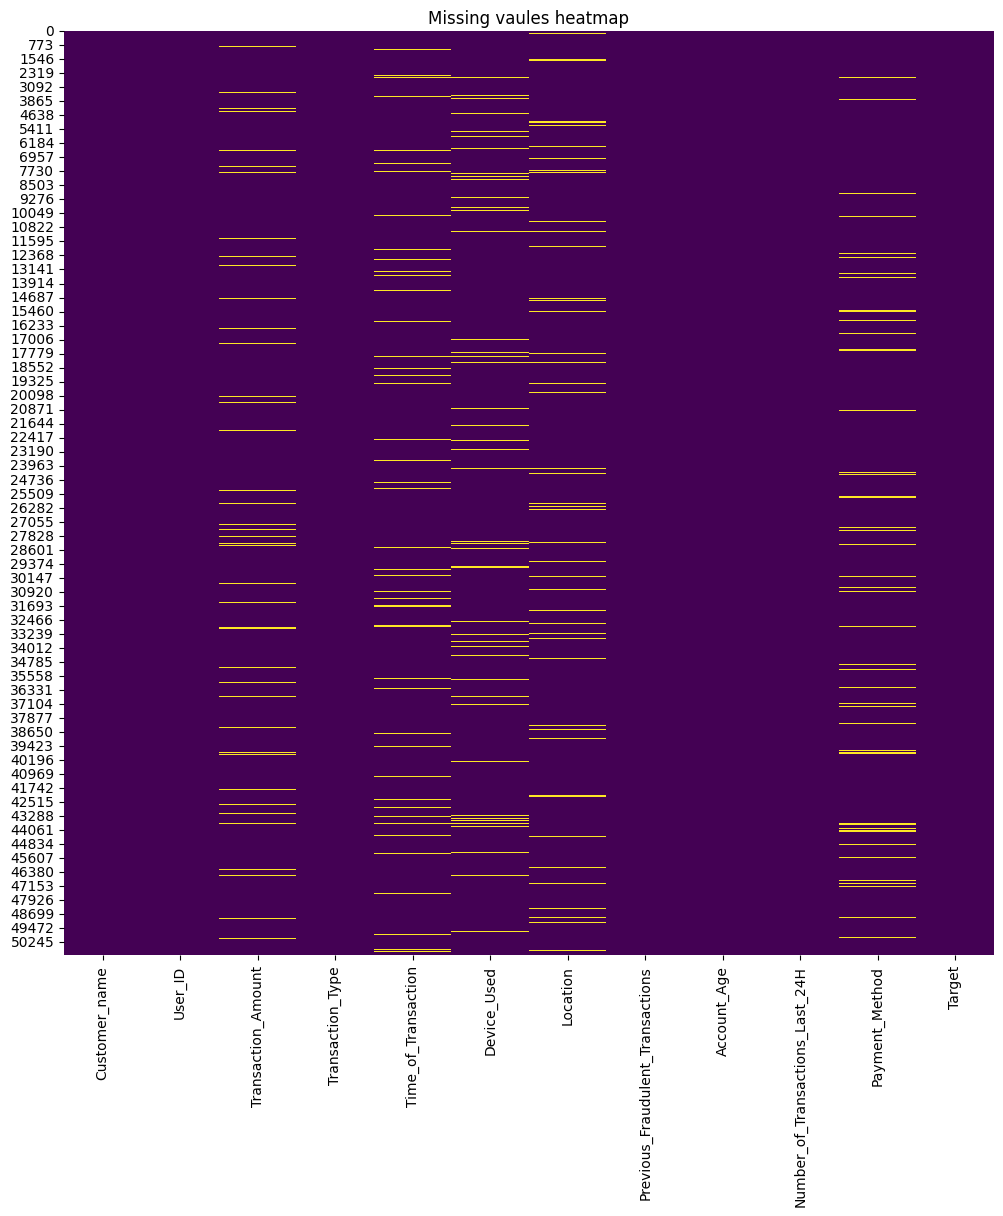

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(fraud_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing vaules heatmap')
plt.show()

<Figure size 1200x600 with 0 Axes>

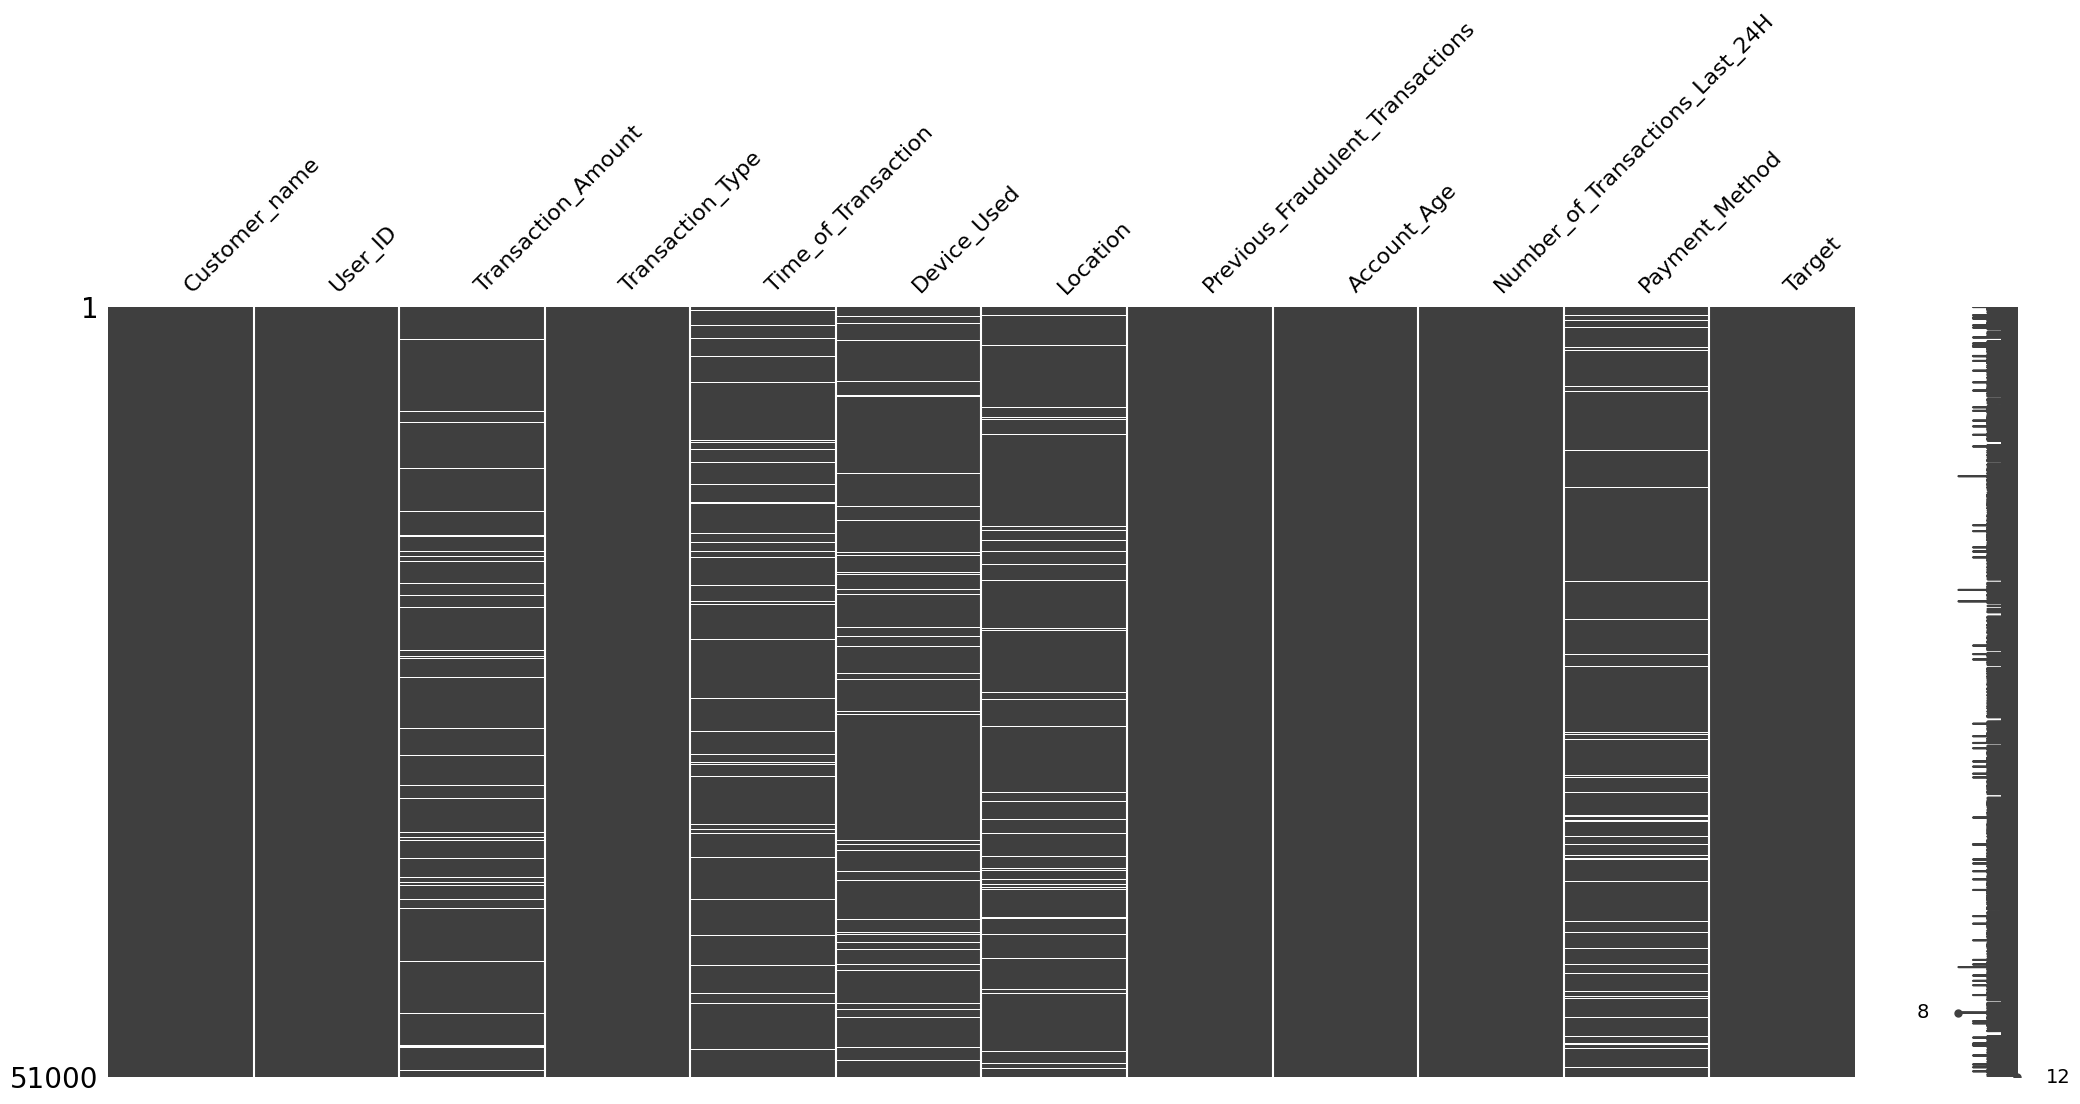

In [13]:
import missingno as msno
import matplotlib.pyplot as plt
# Visualize missing values
plt.figure(figsize=(12,6))
msno.matrix(fraud_data)
plt.show()

# Based on your observations, propose and implement appropriate handling strategies for the missing values. Justify your approach for each feature.

In [58]:
import pandas as pd
# drop columns with more than 50% missing values

threshold= 0.5 * len(fraud_data)

clean_fraud_data= fraud_data.dropna(thresh=threshold, axis=1, inplace=False)

clean_fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_name                     51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Target                            51000 non-null  int64  
dtypes: f

In [65]:
# 2. Impute missing values for numerical features
numerical_col= clean_fraud_data.select_dtypes(include=['float64','int64']).columns

for col in numerical_col:
    if clean_fraud_data[col].isnull().sum()>0:
        median= clean_fraud_data[col].median()
        clean_fraud_data[col].fillna(median, inplace=True)

clean_fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_name                     51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                51000 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               51000 non-null  float64
 5   Device_Used                       51000 non-null  object 
 6   Location                          51000 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    51000 non-null  object 
 11  Target                            51000 non-null  int64  
dtypes: f

In [61]:
categorical_col= clean_fraud_data.select_dtypes(include=['object']).columns

for col in categorical_col:
    if clean_fraud_data[col].isnull().sum()>0:
        clean_fraud_data[col].fillna(clean_fraud_data[col].mode()[0], inplace=True)

clean_fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_name                     51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                51000 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               51000 non-null  float64
 5   Device_Used                       51000 non-null  object 
 6   Location                          51000 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    51000 non-null  object 
 11  Target                            51000 non-null  int64  
dtypes: f

/tmp/ipykernel_6669/3698111871.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_fraud_data[col].fillna(clean_fraud_data[col].mode()[0], inplace=True)


In [34]:
# drop remaingin 
clean_fraud_data.dropna(inplace=True)
clean_fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_name                     51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                51000 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               51000 non-null  float64
 5   Device_Used                       51000 non-null  object 
 6   Location                          51000 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    51000 non-null  object 
 11  Target                            51000 non-null  int64  
dtypes: f

#After implementing your strategy, report the final data size. Are there any rows or columns that were completely dropped? explain why.

Shape has stayed the same as it was, only the values are imputed. 
    For numerical we have imputed the with median as it is less affected by the skewness.
    For Categorical we have impited the data with mode  


In [35]:
clean_fraud_data.shape

(51000, 12)

3. Explore the distribution of numerical features:
(a) Create histograms with overlaid Kernel Density Estimation (KDE) plots for all
numerical features.
(b) Create similar plots, but this time separate ones for fraudulent and non-fraudulent
transactions. What differences do you observe?
(c) Based on your observations, what transformations would you recommend for any skewed numerical features? Justify your recommendations.

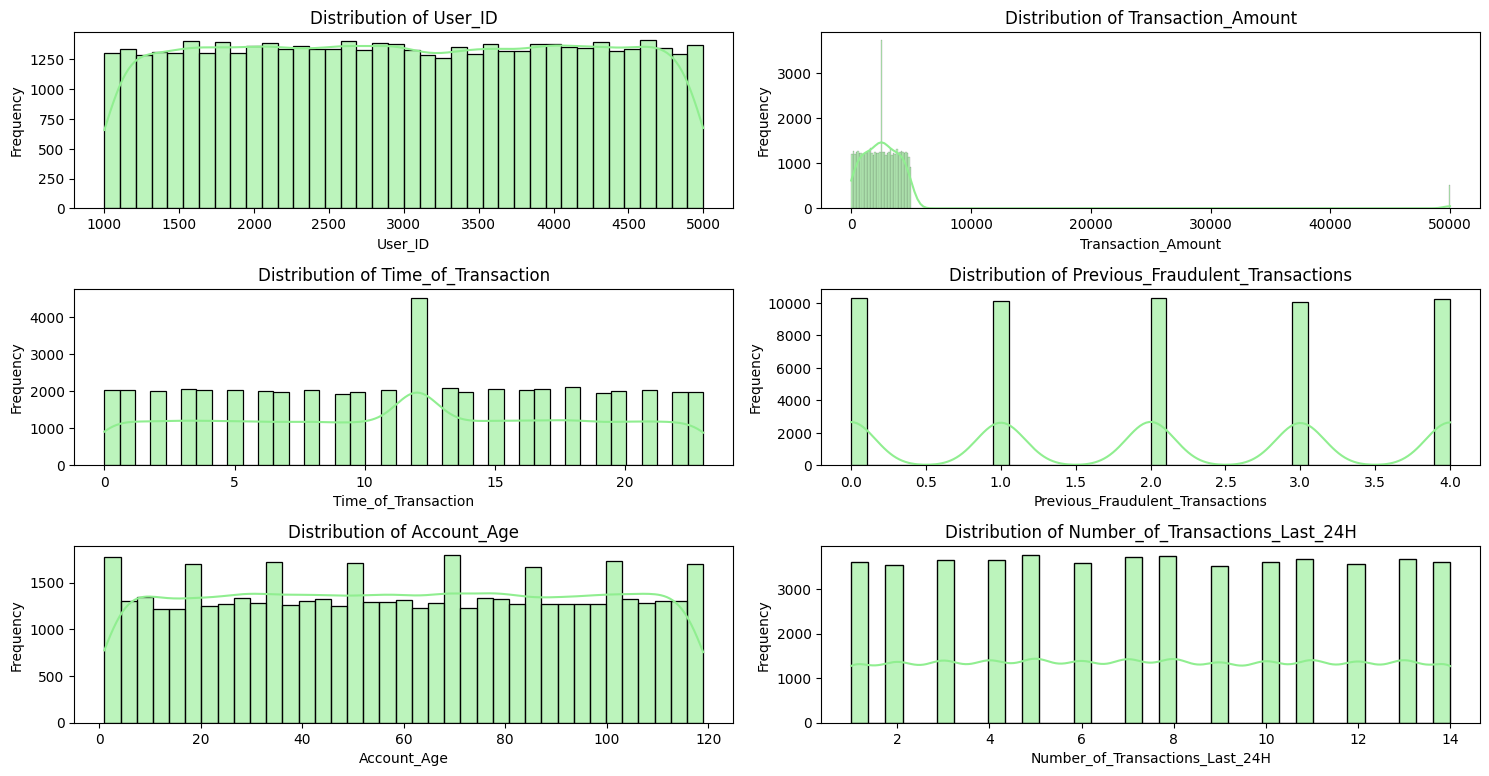

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming fraud_data is your DataFrame
# Select numerical features
numerical_features = clean_fraud_data.select_dtypes(include=['float64', 'int64']).columns
numerical_features= [col for col in numerical_features if col!='Target']
# Create histograms with KDE plots for all numerical features
plt.figure(figsize=(15, 10))  # Adjust figure size for better readability
for i, col in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features) // 2 + 1, 2, i)  # Create subplots
    sns.histplot(clean_fraud_data[col], kde=True, color='lightgreen', alpha=0.6)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

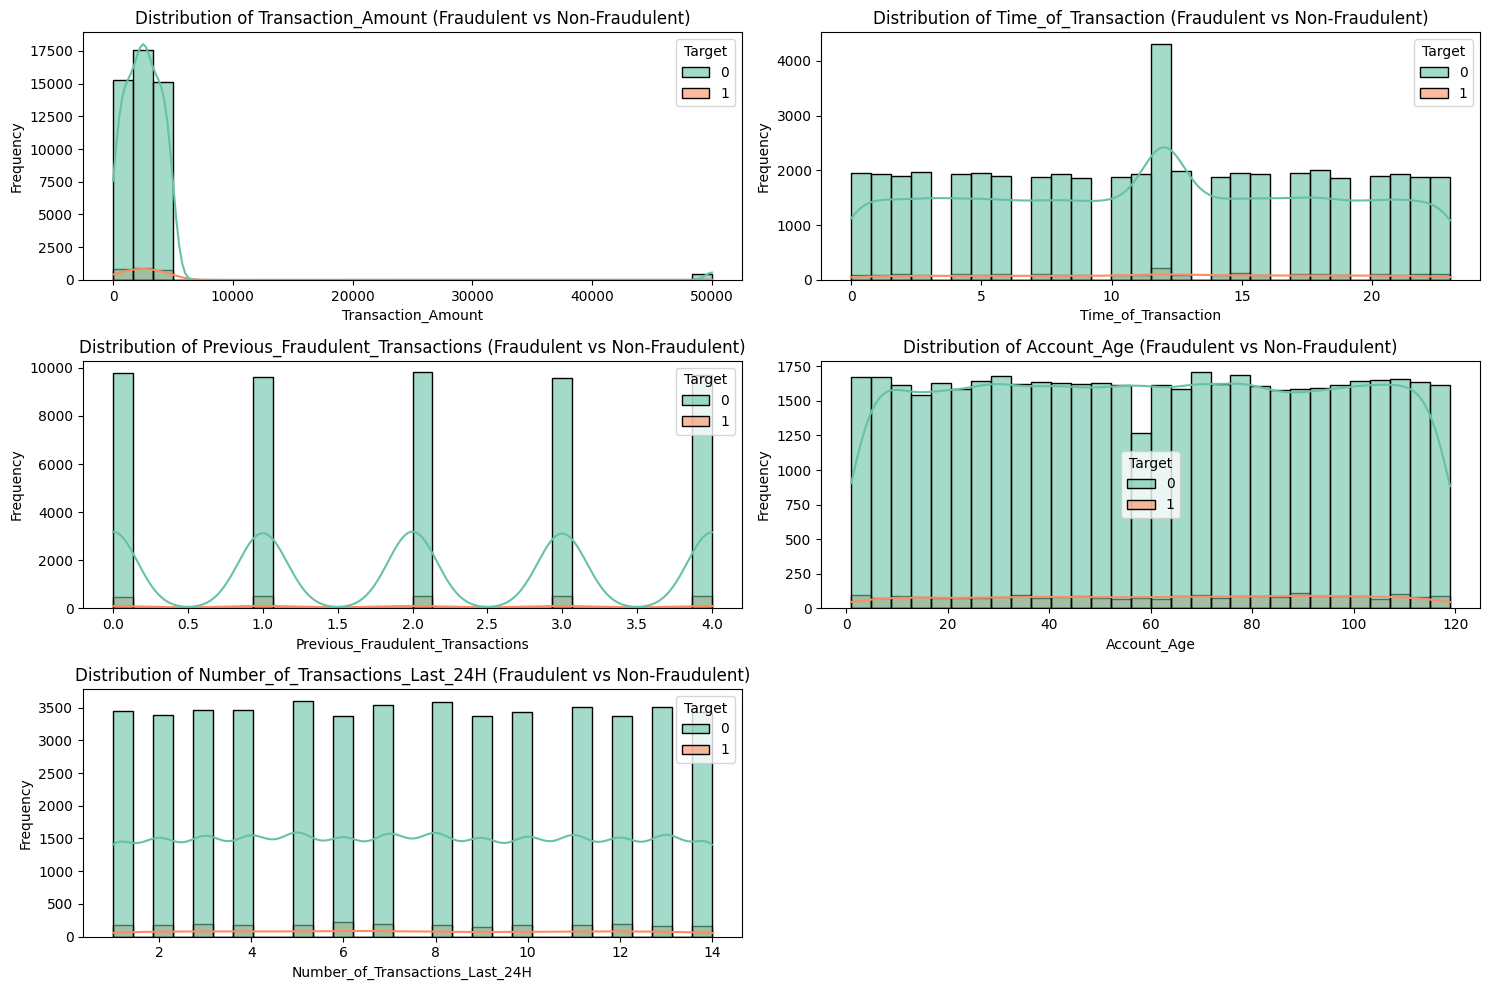

In [72]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# dropped target is its categorical in some sense as it has only 0 and 1 vaules, and User_ID feature is unique for each user
numerical_features= [col for col in clean_fraud_data.select_dtypes(include=[np.number]).columns if col not in ['Target','User_ID']]


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features) // 2 + 1, 2, i)
    sns.histplot(data=clean_fraud_data, x=col, hue='Target', kde=True, bins=30, palette='Set2', alpha=0.6)
    plt.title(f'Distribution of {col} (Fraudulent vs Non-Fraudulent)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

1. Feature numer of transaction and account age is uniform and shows the consistent behaviour across users. 
2. Transaction amount is right skewed 
3. only "Transaction_Amount" feature shows high positive skewness and extreme outliers.

Possible solution:
1. Treat high-value and low-value transactions as separate clusters and build distinct models or apply different thresholds for each segment.

# create a data frame with data Non-fraud and Fraud stats

In [84]:
# Create hierarchical columns with Fraud Status as the top level

import pandas as pd

desired_column= [col for col in clean_fraud_data.select_dtypes(include=[np.number]).columns if col not in ['Target','user_ID']]

columns= columns = pd.MultiIndex.from_product([
    ['Non-Fraud', 'Fraud'],
    ['Mean', 'Median', 'Std']
])

stats_df= pd.DataFrame(index=desired_column, columns= columns)

for status, group in [(0,'Non-Fraud'),(1,'Fraud')]:
    for stat, func in [('Mean','mean'),('Median','median'),('Std','std')]:
        stats_df[(group,stat)]= clean_fraud_data[clean_fraud_data['Target']==status][desired_column].agg(func).round(2)

stats_df 

Non-Fraud                     Fraud          \
                                      Mean  Median      Std     Mean  Median   
User_ID                            3003.00  2995.0  1153.02  3045.89  3022.5   
Transaction_Amount                 2966.92  2524.1  4886.03  3088.77  2524.1   
Time_of_Transaction                  11.50    12.0     6.75    11.72    12.0   
Previous_Fraudulent_Transactions      2.00     2.0     1.42     2.00     2.0   
Account_Age                          59.99    60.0    34.37    60.97    62.0   
Number_of_Transactions_Last_24H       7.50     7.0     4.02     7.43     7.0   

                                           
                                      Std  
User_ID                           1154.54  
Transaction_Amount                5513.60  
Time_of_Transaction                  6.79  
Previous_Fraudulent_Transactions     1.40  
Account_Age                         34.59  
Number_of_Transactions_Last_24H      4.00

4. Investigate outliers in numerical features:
(a) Create individual box plots for all numerical columns to identify potential outliers.
(b) Highlight fraudulent observations in a different color within these box plots. Are outliers more common in fraudulent or non-fraudulent transactions?
(c) Create box plots of all numerical columns on a common scale to visualize any scale differences between features. What conclusions can you draw about the relative scales and distributions?